# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os 
# Import API key
weather_key= os.environ.get("open_weather_key")

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for coord in lat_lngs:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

586

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("Beginning Data Retrieval")
for index, city in enumerate(cities,1):
    try:
        url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_key}"
        data = requests.get(url).json()
        city_name.append(data["name"])
        cloudiness.append(data["clouds"]["all"])
        country.append(data["sys"]["country"])
        date.append(data["dt"])
        humidity.append(data["main"]["humidity"])
        lat.append(data["coord"]["lat"])
        lng.append(data["coord"]["lon"])
        max_temp.append(data["main"]["temp_max"])
        wind_speed.append(data["wind"]["speed"])
        print(f"Processing Record {index} of Set 1 | {city}")
    except KeyError:
        print("City not found. Skipping...")
        index = index + 1
        

Beginning Data Retrieval
Processing Record 1 of Set 1 | yulara
Processing Record 2 of Set 1 | byron bay
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | saskylakh
City not found. Skipping...
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | sao felix do xingu
Processing Record 9 of Set 1 | omalur
Processing Record 10 of Set 1 | kavieng
Processing Record 11 of Set 1 | roald
Processing Record 12 of Set 1 | zihuatanejo
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | hamilton
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | badajoz
Processing Record 17 of Set 1 | tuatapere
Processing Record 18 of Set 1 | beringovskiy
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | tiznit
Processing Record 21 of Set 1 | guerrero negro
Processing Record 22 of Set 1 | hermanus
Processing Record 23 of Set 1 | dobryatino
Processing Record 24 of Set 1 | 

Processing Record 203 of Set 1 | auki
Processing Record 204 of Set 1 | katsuura
Processing Record 205 of Set 1 | pevek
Processing Record 206 of Set 1 | beni mazar
City not found. Skipping...
City not found. Skipping...
Processing Record 209 of Set 1 | narsaq
Processing Record 210 of Set 1 | komsomolskiy
Processing Record 211 of Set 1 | chak azam sahu
Processing Record 212 of Set 1 | leh
Processing Record 213 of Set 1 | olinda
City not found. Skipping...
Processing Record 215 of Set 1 | mao
Processing Record 216 of Set 1 | kodiak
Processing Record 217 of Set 1 | cape town
Processing Record 218 of Set 1 | bombay
Processing Record 219 of Set 1 | kargasok
Processing Record 220 of Set 1 | buala
Processing Record 221 of Set 1 | baymak
Processing Record 222 of Set 1 | panzhihua
Processing Record 223 of Set 1 | ancud
Processing Record 224 of Set 1 | terney
Processing Record 225 of Set 1 | kamenka
Processing Record 226 of Set 1 | geraldton
Processing Record 227 of Set 1 | gisborne
Processing Re

Processing Record 405 of Set 1 | saint-leu
Processing Record 406 of Set 1 | quesnel
Processing Record 407 of Set 1 | necochea
Processing Record 408 of Set 1 | weyburn
Processing Record 409 of Set 1 | meulaboh
Processing Record 410 of Set 1 | atikokan
Processing Record 411 of Set 1 | yining
Processing Record 412 of Set 1 | althofen
Processing Record 413 of Set 1 | astoria
Processing Record 414 of Set 1 | mozarlandia
Processing Record 415 of Set 1 | puerto colombia
Processing Record 416 of Set 1 | palmer
Processing Record 417 of Set 1 | batangafo
Processing Record 418 of Set 1 | hun
Processing Record 419 of Set 1 | mackay
Processing Record 420 of Set 1 | kosonsoy
City not found. Skipping...
Processing Record 422 of Set 1 | koundara
City not found. Skipping...
Processing Record 424 of Set 1 | mezen
Processing Record 425 of Set 1 | tsagan aman
Processing Record 426 of Set 1 | huangchuan
Processing Record 427 of Set 1 | vestmannaeyjar
Processing Record 428 of Set 1 | phonhong
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df = pd.DataFrame({"City":city_name,"Lat":lat,"Lng":lng,"Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
                   "Wind Speed":wind_speed,"Country":country,"Date":date})
df.index.name = "City ID"
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
0,Yulara,-25.24,130.99,57.20,30,0,10.29,AU,1596069696
1,Byron Bay,-28.65,153.62,64.40,63,0,12.75,AU,1596069696
2,Avarua,-21.21,-159.78,69.80,83,1,6.93,CK,1596069696
3,Saskylakh,71.92,114.08,57.90,59,0,3.31,RU,1596069696
4,Busselton,-33.65,115.33,51.01,97,82,6.69,AU,1596069527


In [5]:
df.count()

City          537
Lat           537
Lng           537
Max Temp      537
Humidity      537
Cloudiness    537
Wind Speed    537
Country       537
Date          537
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
df.describe()
#max value of Humidity column = 100.00 therefore there are no cities that have humidity > 100%

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,537.000000,537.00000,537.000000,537.000000,537.000000,537.000000,5.370000e+02
mean,21.441657,19.10784,68.664879,71.640596,47.553073,7.502644,1.596070e+09
std,33.517708,90.94196,13.933862,19.948705,40.879664,5.056854,7.051039e+01
min,-54.800000,-179.17000,30.200000,1.000000,0.000000,0.430000,1.596069e+09
25%,-5.200000,-60.28000,57.330000,60.000000,1.000000,3.400000,1.596070e+09
50%,27.800000,25.97000,70.470000,76.000000,40.000000,6.290000,1.596070e+09
75%,49.200000,96.13000,79.430000,87.000000,90.000000,10.290000,1.596070e+09
max,78.220000,179.32000,106.000000,100.000000,100.000000,27.200000,1.596070e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
humidity_outliers = df[df["Humidity"] > 100]
print(humidity_outliers.index)
#this confirms the result above, that there are no values for humidity > 100.

Int64Index([], dtype='int64', name='City ID')


In [8]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
df.to_csv("data.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

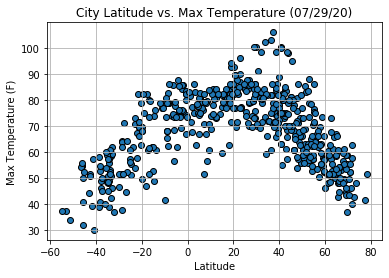

In [9]:
plt.scatter(df["Lat"],df["Max Temp"], edgecolors="black")
plt.title("City Latitude vs. Max Temperature (07/29/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("Temperature.png")
plt.show()

In [10]:
# Here we see that as latitude gets closer and closer to 0 (i.e. the equator), temperature increases. This is consistent
# with the common sense knowledge that temperatures are hotter closer to the equator. 
# As we move away from the equator (in either direction - towards the South pole or the North pole), temperatures decrease.

## Latitude vs. Humidity Plot

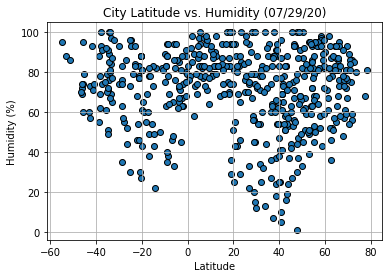

In [11]:
plt.scatter(df["Lat"],df["Humidity"], edgecolors="black")
plt.title("City Latitude vs. Humidity (07/29/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Humidity.png")
plt.show()

In [12]:
# Here we see a strange pattern - there are cities near/around the equator (-40 to 0 degrees and 20-50) that have low 
# (below 50%) humidity values, while cities OUTSIDE the mentioned latititude ranges mostly have humidity values above 50%

## Latitude vs. Cloudiness Plot

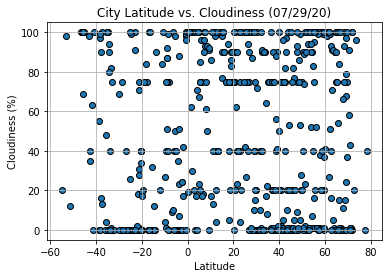

In [13]:
plt.scatter(df["Lat"],df["Cloudiness"], edgecolors="black")
plt.title("City Latitude vs. Cloudiness (07/29/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Cloudiness.png")
plt.show()

In [14]:
# Here we see that many cities reported either ~100% or ~0% clouds. This is likely due to the fact that we have a random
#sample of just ONE day from each city. Variations in cloudiness over time are not reported here.

## Latitude vs. Wind Speed Plot

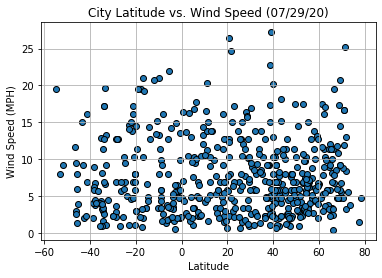

In [15]:
plt.scatter(df["Lat"],df["Wind Speed"], edgecolors="black")
plt.title("City Latitude vs. Wind Speed (07/29/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid()
plt.savefig("Wind_Speed.png")
plt.show()

In [16]:
# Here we see that wind speed is fairly evenly spread out and uniform regardless of latitude, with most cities reporting
# under 10 MPH winds. 

## Linear Regression

In [55]:
# OPTIONAL: Create a function to create Linear Regression plots
def linregplot(x,y):
    plt.scatter(x,y, edgecolors="black")
    plt.grid()
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = slope * x + intercept
    plt.plot(x, regress_values, "r-")
    
    left, right = plt.xlim()
    bottom, top = plt.ylim()
    
    plt.annotate(f"y={slope}x + {intercept}", (right, top), annotation_clip = False, fontsize = 12, color = "red" )
    plt.annotate(f"p-value={pvalue}", (right, bottom), annotation_clip = False, fontsize =12, color = "red")
    plt.show()


In [50]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = df[df["Lat"] > 0.0]
southern_df = df[df["Lat"] < 0.0]
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
3,Saskylakh,71.92,114.08,57.90,59,0,3.31,RU,1596069696
7,Omalur,11.74,78.05,73.42,90,98,1.59,IN,1596069697
9,Roald,62.58,6.13,57.20,87,16,10.29,NO,1596069697
10,Zihuatanejo,17.63,-101.55,83.68,75,94,4.85,MX,1596069697
12,Hamilton,39.18,-84.53,86.00,54,1,4.70,US,1596069643


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

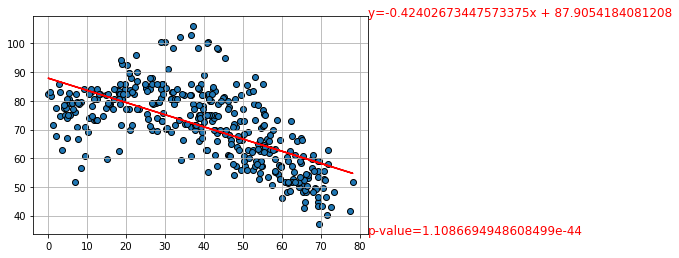

In [51]:
linregplot(northern_df["Lat"],northern_df["Max Temp"])

In [52]:
# The p-value in the above linear regression eq. is much less than the standard alpha = 0.05, which means that 
# for the Northern Hemisphere, there is a statistically significant negative correlation between latitude and temperature.
# In other words, as we move above the equator (latitude increases), temperatures get colder (temp decreases).

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

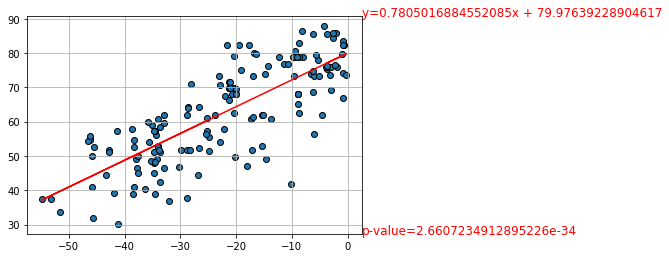

In [53]:
linregplot(southern_df["Lat"],southern_df["Max Temp"])

In [ ]:
# The p-value in the above linear regression eq. is much less than the standard alpha = 0.05, which means that 
# for the Southern Hemisphere, there is a statistically significant positive correlation between latitude and temperature.
# In other words, as we move below the equator (latitude decreases), temperatures get colder (temp decreases).

# OR, one can view it in opposite terms: as we move closer to the equator starting from the South Pole,(latitude increases)
# temperatures get warmer (temp increases).

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

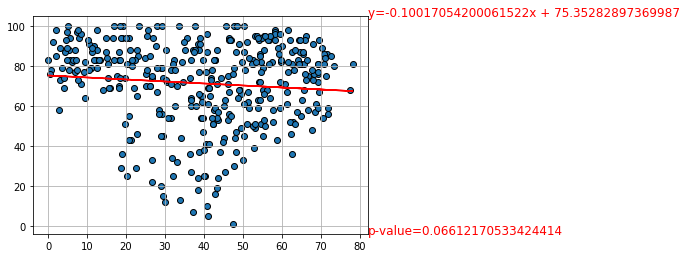

In [54]:
linregplot(northern_df["Lat"], northern_df["Humidity"])

In [ ]:
# There is no statistically significant correlation between humidity and latitude in the southern hemisphere, 
# based on the data. P-value is greater than alpha=0.05.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

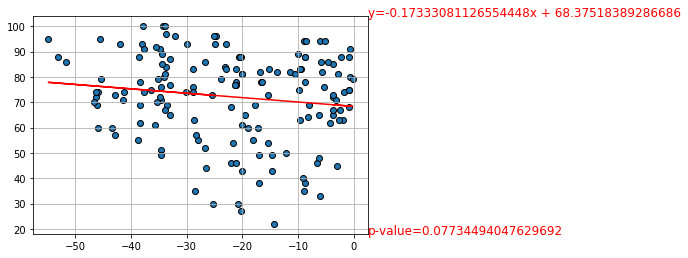

In [56]:
linregplot(southern_df["Lat"], southern_df["Humidity"])

In [ ]:
# There is no statistically significant correlation between humidity and latitude in the southern hemisphere, 
# based on the data. P-value is greater than alpha=0.05.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

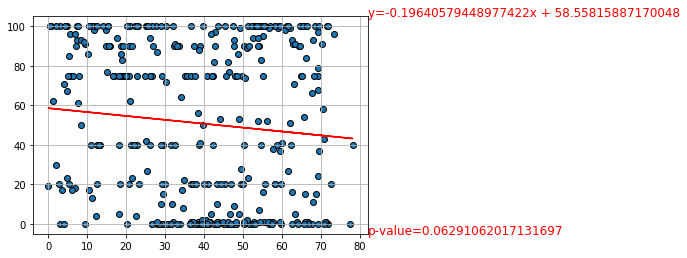

In [57]:
linregplot(northern_df["Lat"],northern_df["Cloudiness"])

In [ ]:
# There is no statistically significant correlation between cloudiness and latitude in the northern hemisphere, 
# based on the data. P-value is greater than alpha=0.05.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

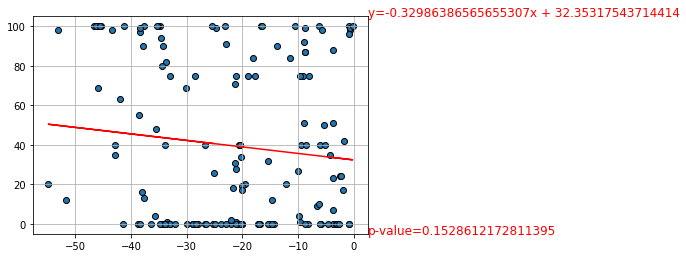

In [58]:
linregplot(southern_df["Lat"], southern_df["Cloudiness"])

In [ ]:
# There is no statistically significant correlation between cloudiness and latitude in the southern hemisphere, 
# based on the data. P-value is greater than alpha=0.05.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

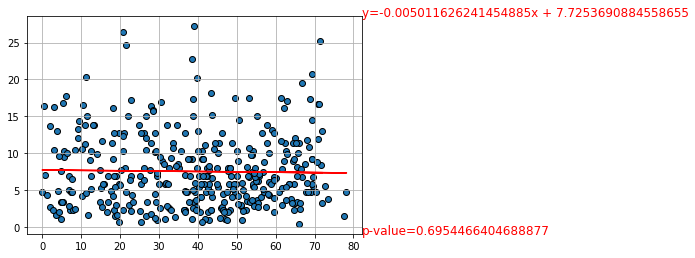

In [59]:
linregplot(northern_df["Lat"], northern_df["Wind Speed"])

In [ ]:
# There is no statistically significant correlation at all between wind speed and latitude in the northern hemisphere, 
# based on the data. P-value is much greater than alpha=0.05.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

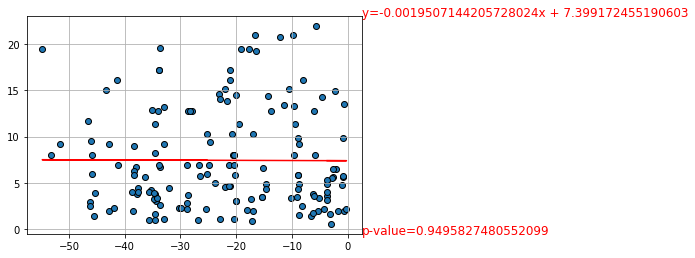

In [60]:
linregplot(southern_df["Lat"], southern_df["Wind Speed"])

In [ ]:
# There is no statistically significant correlation at all between wind speed and latitude in the southern hemisphere, 
# based on the data. P-value is much greater than alpha=0.05.